In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving ADA-USD.csv to ADA-USD.csv
User uploaded file "ADA-USD.csv" with length 229732 bytes


In [ ]:
import io
df = pd.read_csv(io.StringIO(uploaded['ADA-USD.csv'].decode('utf-8')))
df.head()

,timestamp,adjclose,open,high,volume,low,close
0,2017-11-09 00:00:00,0.032053,0.025160,0.035060,18716200,0.025006,0.032053
1,2017-11-10 00:00:00,0.027119,0.032219,0.033348,6766780,0.026451,0.027119
2,2017-11-11 00:00:00,0.027437,0.026891,0.029659,5532220,0.025684,0.027437
3,2017-11-12 00:00:00,0.023977,0.027480,0.027952,7280250,0.022591,0.023977
4,2017-11-13 00:00:00,0.025808,0.024364,0.026300,4419440,0.023495,0.025808


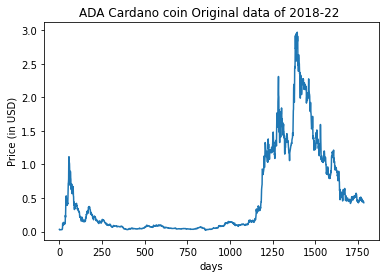

In [ ]:

plt.plot(df.index, df['adjclose'])
plt.title('ADA Cardano coin Original data of 2018-22 ')
plt.xlabel('days')
plt.ylabel('Price (in USD)')
plt.show()

In [ ]:
# Converting the'x'variable i.e. the Days column in to date-time format, to be treated as the index of Y here.
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)

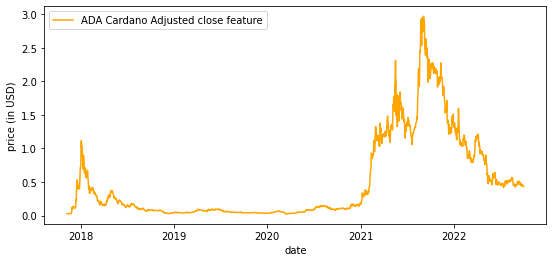

In [ ]:
plt.figure(figsize=(9,4))
plt.plot(df['adjclose'],color='orange', label= 'ADA Cardano Adjusted close feature')
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

Text(0, 0.5, 'price (in USD)')

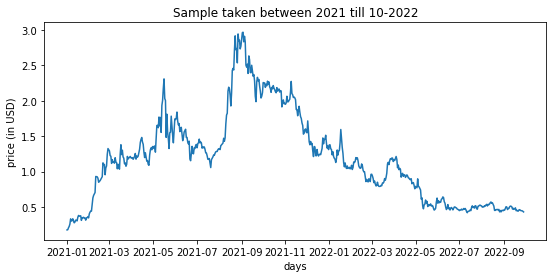

In [ ]:



plt.figure(figsize=(9,4))
df = df.loc['2021-01' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2021 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [ ]:
# # Dataset with date index (X - independent variable)
# df['adjclose']= np.round(df['adjclose'][:],1)
# df['adjclose']

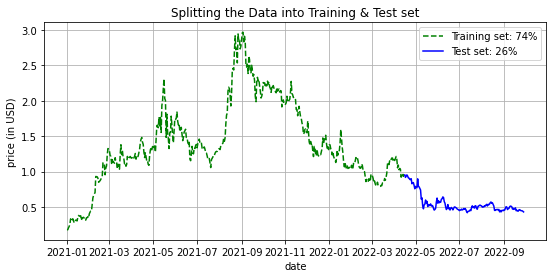

In [ ]:
plt.figure(figsize=(9,4))
plt.grid(True)
to_row = int(len(df)*0.74)
training_data = list(df[0:to_row]['adjclose'])
testing_data = list(df[to_row:]['adjclose'])
plt.plot(df[0:to_row]['adjclose'],color='green', label= 'Training set: 74%',linestyle ='dashed')
plt.plot(df[to_row:]['adjclose'],color='blue', label= 'Test set: 26%')
plt.title("Splitting the Data into Training & Test set")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [ ]:
# define input sequence
timeseries_data = list(df[0:to_row]['adjclose'])

In [ ]:
# Working on Univariate data
# preparing independent and dependent features
def prepare_data(timeseries_data, n_steps):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
# choosing a number of time steps
n_steps = 3
# splitting into samples
X, y = prepare_data(timeseries_data, n_steps)

In [ ]:
#for i in range(len(X)):
 # print(X[i],y[i])

In [ ]:
print(df[0:to_row]['adjclose'])

timestamp
2021-01-01    0.175350
2021-01-02    0.177423
2021-01-03    0.204995
2021-01-04    0.224762
2021-01-05    0.258314
                ...   
2022-04-11    0.920450
2022-04-12    0.955145
2022-04-13    0.974696
2022-04-14    0.932412
2022-04-15    0.954717
Name: adjclose, Length: 470, dtype: float64


In [ ]:
 n_features = 1
# #X = X.reshape((X.shape[0], X.shape[1], n_features))



Applying Stacked LSTM LSTM Algorithm:
Multiple hidden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model.


In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
#n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:

...
# fit model
model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 2/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 4/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0092
Epoch 5/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 7/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0089
Epoch 8/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0102
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0094
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0093
Epoch 11/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0088
Epoch 12/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0085
Epoch 13/200
15/15 [=================

In [ ]:
print(np.array(training_data))

[0.17535    0.177423   0.20499501 0.22476199 0.25831401 0.331898
 0.29998001 0.30559701 0.332973   0.30489501 0.275466   0.28700301
 0.313609   0.31039599 0.30252999 0.35244399 0.379852   0.37142801
 0.36913699 0.37539399 0.31020901 0.34957701 0.34564301 0.353881
 0.34388599 0.34423399 0.31308001 0.346129   0.348131   0.36261901
 0.34489799 0.402033   0.426247   0.44139999 0.44105101 0.53787398
 0.627886   0.66323799 0.68251097 0.70351601 0.930318   0.92774099
 0.925587   0.90571898 0.84841901 0.86101198 0.870951   0.89091998
 0.91411901 0.92764902 1.12295794 1.10052001 1.09915102 0.95470899
 1.05165696 1.07911599 1.24110496 1.32485998 1.30805898 1.29238796
 1.225582   1.21659303 1.11486804 1.16852295 1.13101196 1.13336694
 1.11805296 1.19516098 1.13500297 1.12478995 1.03914404 1.10331404
 1.05915403 1.03353906 1.24295294 1.37867296 1.23900604 1.30217004
 1.20654094 1.18913996 1.10987401 1.12155199 1.07500196 1.10157394
 1.21396899 1.17657697 1.19112396 1.20254099 1.21331704 1.19326401

In [ ]:
x_input = np.array([0.97469598,0.93241203 , 0.95471698])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


[0.9638232]
1 day input [0.93241203 0.95471698 0.9638232 ]
1 day output [[0.97992337]]
2 day input [0.95471698 0.9638232  0.97992337]
2 day output [[0.9922391]]
3 day input [0.9638232  0.97992337 0.9922391 ]
3 day output [[1.0050486]]
4 day input [0.97992337 0.9922391  1.0050486 ]
4 day output [[1.0165781]]
5 day input [0.9922391 1.0050486 1.0165781]
5 day output [[1.0276674]]
6 day input [1.0050486 1.0165781 1.0276674]
6 day output [[1.0380446]]
7 day input [1.0165781 1.0276674 1.0380446]
7 day output [[1.0479023]]
8 day input [1.0276674 1.0380446 1.0479023]
8 day output [[1.0572271]]
9 day input [1.0380446 1.0479023 1.0572271]
9 day output [[1.0660855]]


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#df[0:to_row]['adjclose']

In [ ]:

test_set = df[to_row:][0:10]['adjclose']

test_set


timestamp
2022-04-16    0.952640
2022-04-17    0.917466
2022-04-18    0.936730
2022-04-19    0.953333
2022-04-20    0.937341
2022-04-21    0.910474
2022-04-22    0.907154
2022-04-23    0.888503
2022-04-24    0.886350
2022-04-25    0.898695
Name: adjclose, dtype: float64

In [ ]:
date = df[to_row:][0:10]['adjclose'].index

In [ ]:
lst_output

[0.9638232,
 0.97992337,
 0.9922391,
 1.0050486,
 1.0165781,
 1.0276674,
 1.0380446,
 1.0479023,
 1.0572271,
 1.0660855]

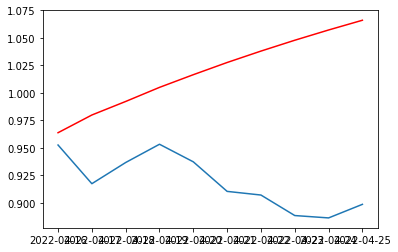

In [ ]:
plt.plot(date,test_set)
plt.plot(date,lst_output, color = 'r')

In [ ]:
# performance Evaluation of 10 days Predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(test_set,lst_output)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-22.197810427125933


In [ ]:
# CALCULATING MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(lst_output) - np.array(test_set)) / np.abs(test_set))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.11093075772496733


In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(test_set, lst_output)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.11382162259539767


In [ ]:
# CALCULATING MEAN ABSOLUTE ERROR
MAE = mean_absolute_error(test_set,lst_output)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:0.1005853295326233
